In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
ecomm = pd.read_csv(r'C:/Users/WELCOME/Desktop/simplilearn/programming basics and pythhon/googleplaystore.csv')
ecomm.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
ecomm.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
ecomm.isna().sum(axis = 0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#Dropping null values along with rows
ecomm.dropna(how = 'any',inplace = True)

In [6]:
# Confirming that null values has been dropped
ecomm.isna().sum(axis = 0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
#Handling Size field
ecomm.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [8]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:  #if k is last index of element of colsizevalues
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [9]:
ecomm['Size'] = ecomm['Size'].apply(change_size)

In [10]:
#filling Size which had NA
ecomm.Size.fillna(method = 'ffill', inplace = True) 

In [11]:
ecomm.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [12]:
ecomm.Size.describe()

count      9360.000000
mean      23143.466079
std       23245.147490
min           8.500000
25%        5500.000000
50%       15000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [13]:
#Handling Reviews column
#Converting reviews column data type from string to int
ecomm.Reviews = ecomm.Reviews.astype("int32")

In [14]:
ecomm.Reviews.dtype

dtype('int32')

In [15]:
#Trying to understand stats of reviews column
ecomm.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [16]:
#Handling Install column
#Converting Install column data type from string to int
#Remove"+" and "," from install column
def remove_symb_install(val):
    return int(val.replace(",","").replace("+",""))

In [17]:
ecomm.Installs = ecomm.Installs.map(remove_symb_install)

In [18]:
ecomm.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [19]:
ecomm.Price

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9360, dtype: object

In [20]:
#Converting Price column datatype
ecomm['Price'] = ecomm.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [21]:
ecomm.Price.value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

# Sanity Check

In [22]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
ecomm.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [23]:
#Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
indexNames = ecomm[(ecomm['Reviews'] > ecomm['Installs'])].index

In [24]:
ecomm.drop(indexNames, inplace=True)

In [25]:
ecomm.shape

(9353, 13)

In [26]:
len(ecomm[(ecomm.Type == "Free") & (ecomm.Price>0)])

0

# Univariate Analysis

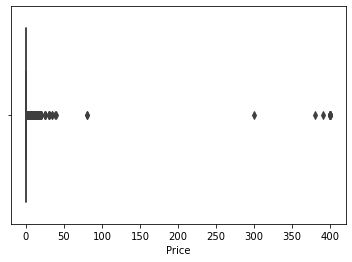

In [27]:
import matplotlib.pyplot as plt, seaborn as sns
sns.boxplot(ecomm.Price)
plt.show()

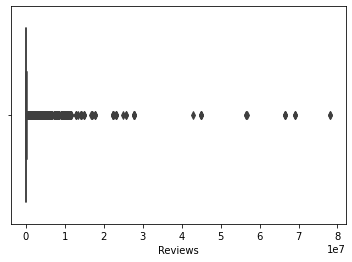

In [28]:
sns.boxplot(ecomm.Reviews)
plt.show()

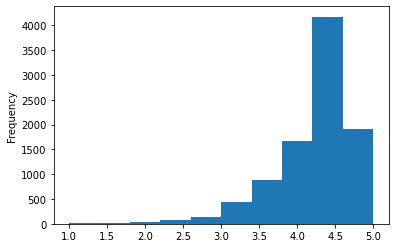

In [29]:
ecomm.Rating.plot.hist()
plt.show()

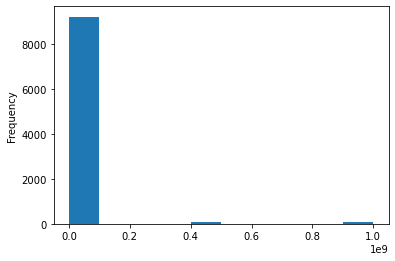

In [30]:
ecomm.Installs.plot.hist()
plt.show()

# Outliers Treatment

In [31]:
ecomm[ecomm.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [32]:
#Checking and dropping of records with price>$200
indexNames1 = ecomm[ecomm.Price>200].index

In [33]:
ecomm.drop(indexNames1, inplace=True)

In [34]:
ecomm.shape

(9338, 13)

In [35]:
indexNames2 = ecomm[ecomm.Reviews>2000000].index

In [36]:
ecomm.drop(indexNames2, inplace=True)

In [37]:
ecomm.shape

(8885, 13)

In [38]:
#Dropping high install values
ecomm.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [39]:
indexNames3 = ecomm[ecomm.Installs>=1000000000].index
ecomm.drop(indexNames3, inplace=True)

In [40]:
ecomm.shape

(8879, 13)

In [41]:
import warnings
warnings.filterwarnings("ignore")

# Bivariate Analysis

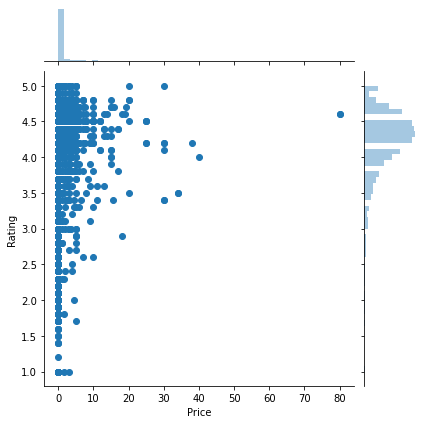

In [42]:
sns.jointplot(ecomm.Price, ecomm.Rating)

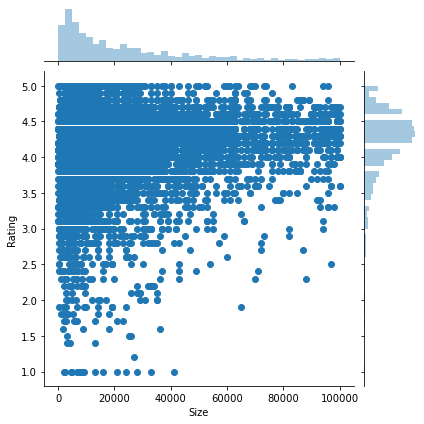

In [43]:
sns.jointplot(ecomm.Size, ecomm.Rating)

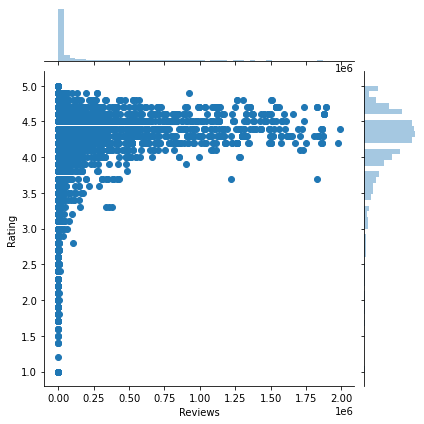

In [44]:
sns.jointplot(ecomm.Reviews, ecomm.Rating)

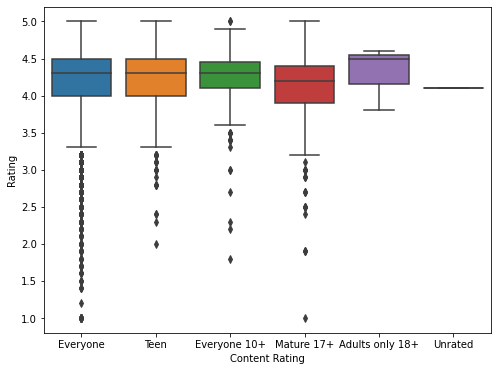

In [45]:
plt.figure(figsize=[8,6])
sns.boxplot(ecomm['Content Rating'], ecomm.Rating)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

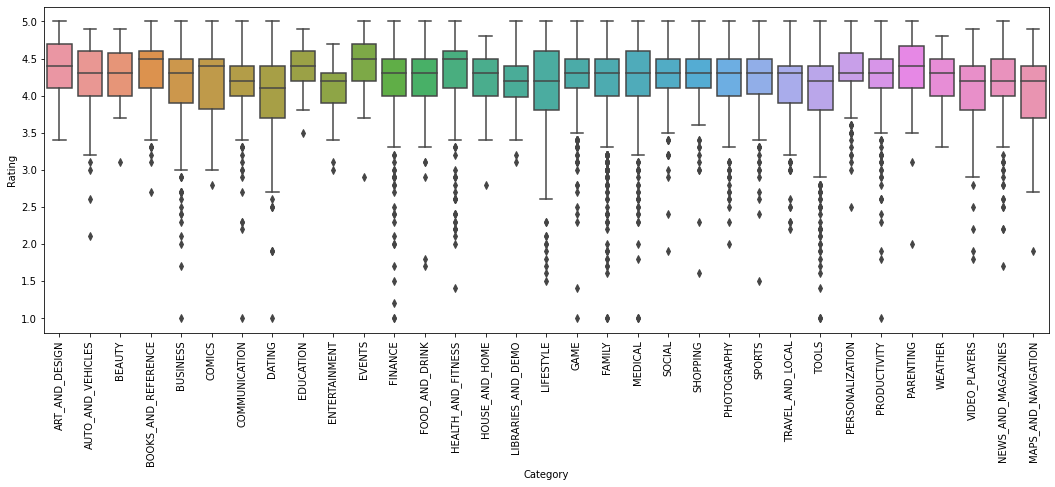

In [46]:
plt.figure(figsize=[18,6])
sns.boxplot(ecomm.Category, ecomm.Rating)
plt.xticks(rotation=90)

# Data Preprocessing

In [47]:
#Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task
ecomm.drop(['App','Last Updated','Current Ver','Android Ver'],axis = 1,inplace = True)

In [48]:
ecomm.head(1)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design


In [49]:
inp1 = ecomm.copy()

In [50]:
inp1.head(1)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design


In [51]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [52]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [53]:
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [54]:
inp1.shape

(8879, 9)

In [69]:
inp2 = pd.get_dummies(inp1, drop_first=True)
inp2.head(2)

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

# Train Test  Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [59]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

Separate the dataframes into X_train, y_train, X_test, y_test

In [60]:
y_train = df_train.pop("Rating")
X_train = df_train

In [61]:
y_test = df_test.pop("Rating")
X_test = df_test

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8879 entries, 0 to 10840
Columns: 157 entries, Rating to Genres_Word
dtypes: float64(5), uint8(152)
memory usage: 1.7 MB


In [65]:
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
#Check the quality of  the model
print("Training score")
print(lr.score(X_train, y_train))
print("Testing score")
print(lr.score(X_test, y_test))

Training score
0.16526079193727217
Testing score
0.13210013584906266


In [67]:
from sklearn.metrics import r2_score

y_train_pred= lr.predict(X_train)

r2_score(y_train, y_train_pred)

0.16526079193727217

In [68]:
y_test_pred= lr.predict(X_test)

r2_score(y_train, y_train_pred)

0.16526079193727217